# **Distance Based Classification Techniques on IRIS Dataset**

<br>

**Iris Dataset**

The Fisher's Iris data set contains attributes of three Iris species, namely, Iris Setosa, Iris versicolor, and Iris virginica. Each species (class) consists of 50 samples, each having four features, Sepal length, Sepal width, Petal length and Petal width.  

<br>

**Distance based classification**

Classification is the process of categorizing an input data using a machine learning model. The Distance based classification technique is a supervised learning process whose goal is to identify a flower's species based on a previously trained dataset. The training takes place by finding the centroid of each class which is later used to assign a label to the data point based on its distance from the centroid. The one with the shortest distance is taken as the label. 

## **Preprocessing**

Import all necessary packages and define constants. Numpy and pandas will come handy for matrix operations and data visualization respectively. Matplotlib and scikit-learn will be useful for plotting. Scikit-learn is a free machine learning library for Python.  

In [86]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error as mse
import statistics as st
import numpy as np
import pandas as pd
import sys
MAX = sys.maxsize

## **Types of Distances**

**Euclidean Distance**

>$d(p_{x1,y1},q_{x2,y2}) = \sqrt{(x_1-x_2)^2+(y_1-y_2)^2}$



In [87]:
def euclidean_distance(p1,p2):
  
  distance = pow(sum([(a - b) ** 2 for a, b in zip(p1, p2)]),0.5)
  return distance  

**Manhattan Distance or City Block Distance**

>$d(p_{x1,y1},q_{x2,y2}) = |x_1 - x_2| + |y_1 - y_2|$

In [88]:
def manhattan_distance(p1,p2):
    
  distance = 0
  for i in range(len(p1)):
      distance += abs(p1[i] - p2[i])
  return distance

**Chessboard Distance or Chebyshev Distance**

>$d(p_{x1,y1},q_{x2,y2}) = max(|x_1 - x_2|,|y_1 - y_2|)$

In [89]:
def chessboard_distance(p1,p2):

  distance = abs(p1[0] - p2[0])
  for i in range(1,len(p1)):
      distance = max(distance,abs(p1[i] - p2[i]))
  return distance

**Minkowski Distance**

>$d(u_{x1,y1},v_{x2,y2}) = (|x_1 - x_2|^p + |y_1 - y_2|^p)^{1/p}$

In [90]:
def minkowski_distance(p1,p2,p):
  
  s = 0
  for i in range(len(p1)):
      s += abs(p1[i] - p2[i])**p
  distance = s**(1/p)
  return distance


**Cosine Distance**

>$\text{cosine distance} = 1 - \text{cosine similarity}(A,B)$

>$\text{cosine similarity} = \cos(\theta) = {\mathbf{A} \cdot \mathbf{B} \over \|\mathbf{A}\| \|\mathbf{B}\|} = \frac{ x_1 * x_2 + y_1 * y_2  }{ \sqrt{x_1^2+y_1^2 }  \sqrt{x_2^2 + y_2^2}}$

In [91]:
def cosine_distance(p1,p2):
  
  norm_p1 = 0
  norm_p2 = 0
  
  for i in range(len(p1)):
      norm_p1 += p1[i]**2
      norm_p2 += p2[i]**2
      
  norm_p1 = norm_p1**0.5
  norm_p2 = norm_p2**0.5
  
  s = 0
  for i in range(len(p1)):
      s += p1[i]*p2[i]
  distance = 1 - s/(norm_p1*norm_p2)
  return distance


**Correlation Distance**

>$CD = 1 - (u - Mean[u]).(v - Mean[v])/
(Norm(u - Mean[u])Norm(v - Mean[v]))$ 


In [92]:
def correlation_distance(p1,p2):
  norm_p1 = 0
  norm_p2 = 0
  
  for i in range(len(p1)):
      norm_p1 += (p1[i] - st.mean(p1))**2
      norm_p2 += (p2[i] - st.mean(p2))**2
      
  norm_p1 = norm_p1**0.5
  norm_p2 = norm_p2**0.5
  
  s = 0
  for i in range(len(p1)):
      s += (p1[i] - st.mean(p1))*(p2[i] - st.mean(p2))
  distance = 1 - s/(norm_p1*norm_p2)
  return distance

**Bray Curtis Distance**

>$BCD[u_{a,b},v_{x,y}] = Total[|(a,b) - (x,y)|]/Total[|(a,b) + (x,y)|]$

In [93]:
def bray_curtis_distance(p1,p2):
  s1 = 0
  s2 = 0

  for i in range(len(p1)):
    s1 += abs(p1[i] - p2[i])
    s2 += abs(p1[i] + p2[i])
  
  distance = s1/s2
  return distance


**Canberra Distance**

$CAD[u_{a,b},v_{x,y}] = Total[|(a,b) - (x,y)|/|(a,b) + (x,y)|]$

In [94]:
def canberra_distance(p1,p2):
  distance = 0

  for i in range(len(p1)):
    s1 = abs(p1[i] - p2[i])
    s2 = abs(p1[i] + p2[i])
    distance += s1/s2

  return distance

### **Loading Iris Dataset**

In [95]:
# iris dataset has three classes
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = [iris.feature_names])
print(df)

    sepal length (cm) sepal width (cm) petal length (cm) petal width (cm)
0                 5.1              3.5               1.4              0.2
1                 4.9              3.0               1.4              0.2
2                 4.7              3.2               1.3              0.2
3                 4.6              3.1               1.5              0.2
4                 5.0              3.6               1.4              0.2
..                ...              ...               ...              ...
145               6.7              3.0               5.2              2.3
146               6.3              2.5               5.0              1.9
147               6.5              3.0               5.2              2.0
148               6.2              3.4               5.4              2.3
149               5.9              3.0               5.1              1.8

[150 rows x 4 columns]


**Plotting Species based on Petal Length and Petal Width**

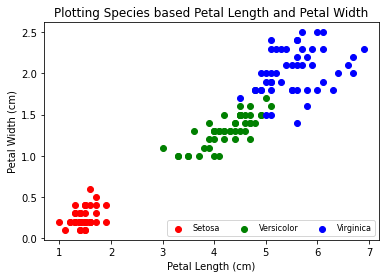

In [96]:
X_petal = iris.data[:, 2:4];
setosa_plot = plt.scatter(X_petal[0:50,0], X_petal[0:50,1],color='red')
versicolor_plot = plt.scatter(X_petal[50:100,0], X_petal[50:100,1],color='green')
virginica_plot = plt.scatter(X_petal[100:150,0], X_petal[100:150,1],color='blue')
plt.legend((setosa_plot,versicolor_plot,virginica_plot),('Setosa', 'Versicolor','Virginica'),numpoints=1, loc='lower right', ncol=3, fontsize=8)
plt.title("Plotting Species based Petal Length and Petal Width")
plt.xlabel('Petal Length (cm)')  
plt.ylabel('Petal Width (cm)')  
plt.show()

**Plotting Species based on Sepal Length and Sepal Width**

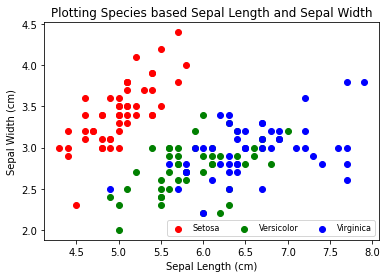

In [97]:
X_sepal = iris.data[:, :2];
setosa_plot = plt.scatter(X_sepal[0:50,0], X_sepal[0:50,1],color='red')
versicolor_plot = plt.scatter(X_sepal[50:100,0], X_sepal[50:100,1],color='green')
virginica_plot = plt.scatter(X_sepal[100:150,0], X_sepal[100:150,1],color='blue')
plt.legend((setosa_plot,versicolor_plot,virginica_plot),('Setosa', 'Versicolor','Virginica'),numpoints=1, loc='lower right', ncol=3, fontsize=8)
plt.title("Plotting Species based Sepal Length and Sepal Width")
plt.xlabel('Sepal Length (cm)')  
plt.ylabel('Sepal Width (cm)')  
plt.show()

To start the training process, we will be requiring two features. These features will allow us to plot the sample data as well help in classifying them. We also need true class labels to group these points according to their classes.

In [98]:
X = iris.data[:, 2:4]  # last two features, petal length and petal width

y = iris.target    # contains true class labels 
print('True Class Labels')
print(y)
print()

# Class Names 0 Setosa, 1 Versicolor, 2 Virginica
tg_names = iris.target_names;

print('Species')
print(tg_names)

True Class Labels
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]

Species
['setosa' 'versicolor' 'virginica']


## **Training Phase**

In [99]:
# Distance Based Classification

########################## Training Phase ########################## 
# Provide 60% of instances 

# Class 0 has instances from 0 to 49
# We need instances from 0 to 29 for training
C0_x = X[0:30,0]
C0_y = X[0:30,1]

# Class 1 has instances from 50 to 99
# We need instances from 50 to 79 for training
C1_x = X[50:80,0]
C1_y = X[50:80,1]

# Class 2 has instances from 100 to 149
# We need instances from 100 to 129 for training
C2_x = X[100:130,0]
C2_y = X[100:130,1]

# Finding centroid for each class

# Centroid of C0
c0_mean_x = st.mean(C0_x)
c0_mean_y = st.mean(C0_y)

# Centroid of C1
c1_mean_x = st.mean(C1_x)
c1_mean_y = st.mean(C1_y)

# Centroid of C2
c2_mean_x = st.mean(C2_x)
c2_mean_y = st.mean(C2_y)

# Placing all centroids together for simplicity
all_centroid = np.array([[c0_mean_x, c0_mean_y],
                        [c1_mean_x, c1_mean_y],
                        [c2_mean_x, c2_mean_y]])    

## **Plotting centroid for each class**




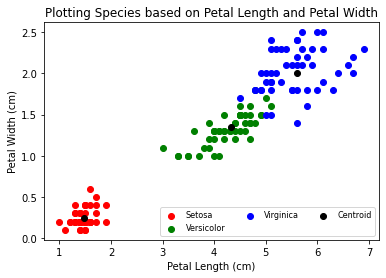

In [100]:
X_petal = iris.data[:, 2:4];
setosa_plot = plt.scatter(X_petal[0:50,0], X_petal[0:50,1],color='red')
versicolor_plot = plt.scatter(X_petal[50:100,0], X_petal[50:100,1],color='green')
virginica_plot = plt.scatter(X_petal[100:150,0], X_petal[100:150,1],color='blue')
centroid_plot = plt.scatter(all_centroid[:,0],all_centroid[:,1],color='black')
plt.legend((setosa_plot,versicolor_plot,virginica_plot,centroid_plot),('Setosa', 'Versicolor','Virginica','Centroid'),numpoints=1, loc='lower right', ncol=3, fontsize=8)
plt.title("Plotting Species based on Petal Length and Petal Width")
plt.xlabel('Petal Length (cm)')  
plt.ylabel('Petal Width (cm)')  
plt.show()

## **Testing Phase**

In [101]:
########################## Testing Phase ########################## 
# Provide 40% of instances 

# Since we don't need class names now, we can simply merge all
# instances together

C_x = np.concatenate((X[30:50,0], X[80:100,0], X[130:150,0] ))
C_y = np.concatenate((X[30:50,1], X[80:100,1], X[130:150,1] ))

# minimum distance
min_dist = MAX

# predicted labels
predicted = [0]*len(C_x);

# actual labels
actual = np.concatenate((y[30:50], y[80:100], y[130:150] ))

for i in range (len(C_x)):
    for j in range(0,3):
        
        distance = euclidean_distance([all_centroid[j,0],all_centroid[j,1]],[C_x[i],C_y[i]])
        
        if(min_dist > distance):
            min_dist = distance
            lbl = j;
    
    predicted[i] = lbl;
    
    #reset min_dist
    min_dist = MAX  

# Displaying Predicted Labels against True Labels
dict = {'True Labels' : actual,
        'Predicted Labels' : predicted}
df2 = pd.DataFrame(dict)

print('Comparision of True Class Labels and Predicted Class Labels\n')
print(df2)


Comparision of True Class Labels and Predicted Class Labels

    True Labels  Predicted Labels
0             0                 0
1             0                 0
2             0                 0
3             0                 0
4             0                 0
5             0                 0
6             0                 0
7             0                 0
8             0                 0
9             0                 0
10            0                 0
11            0                 0
12            0                 0
13            0                 0
14            0                 0
15            0                 0
16            0                 0
17            0                 0
18            0                 0
19            0                 0
20            1                 1
21            1                 1
22            1                 1
23            1                 2
24            1                 1
25            1                 1
26            1      

## **Distance Based Classifier Code**

In the above code, we have seen classification based on euclidean distance. The following code provides distance based classification based on different types of distance measurements. 

The distance_based_classifier function takes in four parameters, feature matrix, true labels, type of distance and training rate. The output of the function is Predicted Labels, MER, Mean Squared Error and Mean Absolute error.

In [102]:
# Distance Based Classification
"""
@author: Ajay Biswas
220CS2184
M.Tech Information Security 
National Institute of Technology, Rourkela
"""

from sklearn import datasets
import statistics as st
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
import sys
MAX = sys.maxsize

def MER_Error(X,Y):
  correct_count = 0
  for i in range(len(X)):
    if(X[i] == Y[i]):
      correct_count = correct_count + 1

  MER_val = 1 - (correct_count/len(X))
  return MER_val

def me(X,Y,d):
    error=0
    error_dist=0
    for i in range(len(X)):
        if(X[i] != Y[i]):
            error += 1
            error_dist+=d[i]
    m_error =error_dist/error
    return m_error

def euclidean_distance(p1,p2):
  
  distance = pow(sum([(a - b) ** 2 for a, b in zip(p1, p2)]),0.5)
  return distance 

def manhattan_distance(p1,p2):
    
  distance = 0
  for i in range(len(p1)):
      distance += abs(p1[i] - p2[i])
  return distance

def chessboard_distance(p1,p2):

  distance = abs(p1[0] - p2[0])
  for i in range(1,len(p1)):
      distance = max(distance,abs(p1[i] - p2[i]))
  return distance

def correlation_distance(p1,p2):
  norm_p1 = 0
  norm_p2 = 0
  
  for i in range(len(p1)):
      norm_p1 += (p1[i] - st.mean(p1))**2
      norm_p2 += (p2[i] - st.mean(p2))**2
      
  norm_p1 = norm_p1**0.5
  norm_p2 = norm_p2**0.5
  
  s = 0
  for i in range(len(p1)):
      s += (p1[i] - st.mean(p1))*(p2[i] - st.mean(p2))
  distance = 1 - s/(norm_p1*norm_p2)
  return distance


def minkowski_distance(p1,p2,p):
  
  s = 0
  for i in range(len(p1)):
      s += abs(p1[i] - p2[i])**p
  distance = s**(1/p)
  return distance


def cosine_distance(p1,p2):
  
  norm_p1 = 0
  norm_p2 = 0
  
  for i in range(len(p1)):
      norm_p1 += p1[i]**2
      norm_p2 += p2[i]**2
      
  norm_p1 = norm_p1**0.5
  norm_p2 = norm_p2**0.5
  
  s = 0
  for i in range(len(p1)):
      s += p1[i]*p2[i]
  distance = 1 - s/(norm_p1*norm_p2)
  return distance
  

def bray_curtis_distance(p1,p2):
  s1 = 0
  s2 = 0

  for i in range(len(p1)):
    s1 += abs(p1[i] - p2[i])
    s2 += abs(p1[i] + p2[i])
  
  distance = s1/s2
  return distance

def canberra_distance(p1,p2):
  distance = 0

  for i in range(len(p1)):
    s1 = abs(p1[i] - p2[i])
    s2 = abs(p1[i] + p2[i])
    distance += s1/s2

  return distance
 

def select_distance(p1,p2,distance_type):
# returns the calculated distance based on the type of distance provided
    
    if(distance_type == "euclidean"):
        return euclidean_distance(p1,p2)
    elif(distance_type == "manhattan" or distance_type == "cityblock"):
        return manhattan_distance(p1,p2)
    elif(distance_type == "chessboard" or distance_type == "chebyshev"):
        return chessboard_distance(p1,p2)
    elif(distance_type == "minkowski"):
        return minkowski_distance(p1,p2,3)
    elif(distance_type == "correlation"):
        return correlation_distance(p1,p2)
    elif(distance_type == "cosine"):
        return cosine_distance(p1,p2)
    elif(distance_type == "bray_curtis"):
        return bray_curtis_distance(p1,p2)
    elif(distance_type == "canberra"):
        return canberra_distance(p1,p2)
    else:
        return None

def distance_based_classifier(X,y,d_type,tp):
# X is a 2D matrix with two columns as features and rows as instances
# y is the true class labels
# d_type is the type of distance taken for classifying
# tp is the fraction of training dataset, the fractional testing dataset will be (1-tp)


    # Placing two features in two separate 2D arrays Species_x and Species_y
    # the rows of this 2D array determines each separate class
    cols = 1
    rows = 0
    for i in range(0,len(y)):
        if(y[i]!=rows):
            cols = 0
            rows = rows + 1
        cols = cols + 1;        
    rows = rows+1;
    
    Species_x = np.zeros((rows, cols))
    Species_y = np.zeros((rows, cols))
    
    cnt = 0
    for i in range(rows):
        for j in range(cols):
           Species_x[i][j] = X[cnt,0]
           Species_y[i][j] = X[cnt,1] 
           cnt = cnt + 1
           
    # rows = no. of classes
    # cols = no. of instances in each class
    
    ########################## Training Phase ########################## 
    
    # invalid training dataset size
    if(tp >= 1 or tp <= 0):
        return None
    
    percent = tp*100
          
    # Slicing from beginning
    train_range_s = 0
    train_range_e = int((cols/100)*percent)  
    
    all_centroid = np.zeros((rows, 2))
    
    # Taking mean of all points of each class and finding their centroid
    for k in range(rows):
        CL_x = Species_x[k][train_range_s:train_range_e]
        CL_mean_x = st.mean(CL_x)
        
        CL_y = Species_y[k][train_range_s:train_range_e]
        CL_mean_y = st.mean(CL_y)
        
        # (x,y) coordinates of centroid, column 0 - x, 1 - y
        all_centroid[k,0] = CL_mean_x;
        all_centroid[k,1] = CL_mean_y;
    
    
    ########################## Testing Phase ########################## 
    
    # Since we don't need class names now, we can simply merge all instances together
    
    # Slicing after the last training instance
    test_range_s = int((cols/100)*percent)  
    test_range_e = cols  
    
    C_x = np.zeros((rows, test_range_e - test_range_s))
    C_y = np.zeros((rows, test_range_e - test_range_s))
    for k in range(rows):
        C_x[k][:] = Species_x[k][test_range_s:test_range_e]
        C_y[k][:] = Species_y[k][test_range_s:test_range_e]       
    # Flattenning numpy array
    C_x = C_x.flatten()
    C_y = C_y.flatten()
    
    # predicted labels
    predicted = [0]*len(C_x);
    
    # actual labels
    # initially we keep labels in different rows w.r.t classes
    # later we will flatten the array
    actual = np.zeros((rows, test_range_e - test_range_s))
    beg = test_range_s
    end = cols
    for k in range(rows):
        actual[k][:] = y[beg:end]
        beg = beg + cols
        end = end + cols
    # flatten the array
    actual = actual.flatten()    
    
    # classifying points by measuring its distance from centroid of each class

    distances_predicted = [0]*len(C_x)

    min_dist = MAX
    for i in range (len(C_x)):
        for j in range(0,rows):
            
            distance = select_distance([all_centroid[j,0],all_centroid[j,1]],[C_x[i],C_y[i]],d_type)
            
            # invalid distance
            if(distance == None):
                return None
            
            # finding the minimum distance  
            if(min_dist > distance):
                min_dist = distance
                distances_predicted[i] = distance 
                lbl = j;
        
        # store predicted label
        predicted[i] = lbl;
        #reset min_dist
        min_dist = MAX

    # Calculating actual distances
    distances_actual = [0]*len(C_x);
    for i in range (len(C_x)):
      distances_actual[i] = select_distance([all_centroid[int(actual[i]),0],all_centroid[int(actual[i]),1]],[C_x[i],C_y[i]],d_type)
              
    # Accuracy Calculations
    mer_error = MER_Error(actual,predicted)

    mse_error = mse(distances_actual,distances_predicted)
    mae_error = mae(distances_actual,distances_predicted)
    mean_error = me(actual,predicted,distances_predicted)

    return [predicted, mer_error,mse_error,mae_error,mean_error]

######################################################################################

# iris dataset has three classes with 50 instances each
iris = datasets.load_iris()
X = iris.data[:, :2]  # first two features
y = iris.target    # contains true class labels 

euclidean = distance_based_classifier(X,y,"euclidean",0.6)
manhattan = distance_based_classifier(X,y,"manhattan",0.6)
chessboard = distance_based_classifier(X,y,"chessboard",0.6)
minkowski = distance_based_classifier(X,y,"minkowski",0.6)
cosine = distance_based_classifier(X,y,"cosine",0.6)
correlation = distance_based_classifier(X,y,"correlation",0.6)
chebyshev = distance_based_classifier(X,y,"chebyshev",0.6)
bray_curtis = distance_based_classifier(X,y,"bray_curtis",0.6)
canberra = distance_based_classifier(X,y,"canberra",0.6)

## **Estimated Errors**

In [103]:
errors = [ euclidean[1:], manhattan[1:], chessboard[1:], minkowski[1:], cosine[1:], correlation[1:], chebyshev[1:], bray_curtis[1:], canberra[1:]]
dff = pd.DataFrame(errors, columns = ['MER','MSE','MAE','Mean Error'],
index = ['Euclidean','Manhattan','Chessboard','Minkowski','Cosine','Correlation','Chebyshev','Bray Curtis','Canberra'])

print(dff)

                  MER           MSE           MAE    Mean Error
Euclidean    0.166667  1.737073e-02  4.404150e-02  4.460137e-01
Manhattan    0.183333  2.967315e-02  6.350000e-02  5.496970e-01
Chessboard   0.166667  1.667593e-02  4.300000e-02  3.550000e-01
Minkowski    0.150000  1.641280e-02  4.207013e-02  3.485730e-01
Cosine       0.283333  9.752966e-07  2.138207e-04  5.865861e-04
Correlation  0.550000  1.889979e-32  7.401487e-17 -1.009294e-16
Chebyshev    0.166667  1.667593e-02  4.300000e-02  3.550000e-01
Bray Curtis  0.183333  8.650894e-05  3.376324e-03  3.226578e-02
Canberra     0.166667  2.407011e-04  5.072313e-03  6.682226e-02


**Misclassification Error Rate Vs. Classifier**

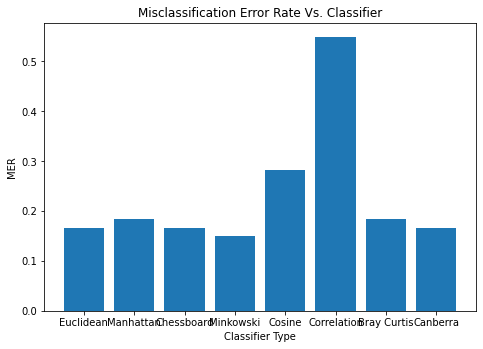

In [104]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
error_type = ['Euclidean', 'Manhattan', 'Chessboard', 'Minkowski', 'Cosine','Correlation','Bray Curtis','Canberra']
dt = [euclidean[1],manhattan[1],chessboard[1],minkowski[1],cosine[1],correlation[1],bray_curtis[1],canberra[1]]
ax.bar(error_type,dt)
plt.title("Misclassification Error Rate Vs. Classifier")
plt.xlabel('Classifier Type')  
plt.ylabel('MER')  
plt.show()

**Mean Squared Error Rate Vs. Classifier**

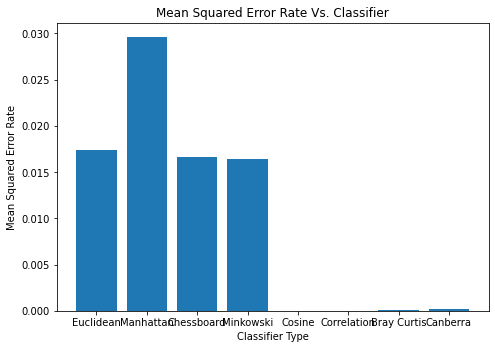

In [105]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
error_type = ['Euclidean', 'Manhattan', 'Chessboard', 'Minkowski', 'Cosine','Correlation','Bray Curtis','Canberra']
dt = [euclidean[2],manhattan[2],chessboard[2],minkowski[2],cosine[2],correlation[2],bray_curtis[2],canberra[2]]
ax.bar(error_type,dt)
plt.title("Mean Squared Error Rate Vs. Classifier")
plt.xlabel('Classifier Type')  
plt.ylabel('Mean Squared Error Rate')  
plt.show()

**Mean Absolute Rate Vs. Classifier**

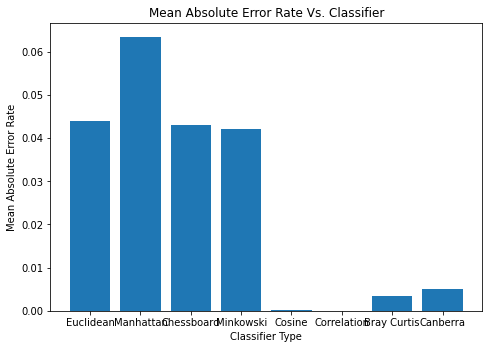

In [106]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
error_type = ['Euclidean', 'Manhattan', 'Chessboard', 'Minkowski', 'Cosine','Correlation','Bray Curtis','Canberra']
dt = [euclidean[3],manhattan[3],chessboard[3],minkowski[3],cosine[3],correlation[3],bray_curtis[3],canberra[3]]
ax.bar(error_type,dt)
plt.title("Mean Absolute Error Rate Vs. Classifier")
plt.xlabel('Classifier Type')  
plt.ylabel('Mean Absolute Error Rate')  
plt.show()

**Mean Error Rate Vs. Classifier**

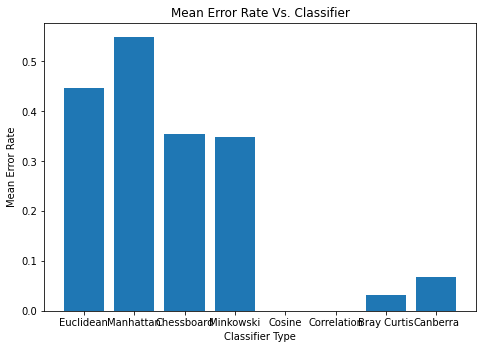

In [107]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
error_type = ['Euclidean', 'Manhattan', 'Chessboard', 'Minkowski', 'Cosine','Correlation','Bray Curtis','Canberra']
dt = [euclidean[4],manhattan[4],chessboard[4],minkowski[4],cosine[4],correlation[4],bray_curtis[4],canberra[4]]
ax.bar(error_type,dt)
plt.title("Mean Error Rate Vs. Classifier")
plt.xlabel('Classifier Type')  
plt.ylabel('Mean Error Rate')  
plt.show()